In [1]:
import os
import json
import pandas as pd
from datetime import datetime

DATA_DIR = 'data'

dynasty_rows = []
redraft_rows = []

for filename in os.listdir(DATA_DIR):
    if filename.endswith('.json'):
        filepath = os.path.join(DATA_DIR, filename)
        with open(filepath, 'r') as f:
            data = json.load(f)
            # Use 'lastUpdated' field for timestamp if available, else fallback to file mtime
            last_updated = data.get('lastUpdated')
            if last_updated:
                try:
                    # Remove 'Z' if present and parse as UTC
                    timestamp = datetime.fromisoformat(last_updated.replace('Z', '+00:00'))
                except Exception:
                    timestamp = datetime.fromtimestamp(os.path.getmtime(filepath))
            else:
                timestamp = datetime.fromtimestamp(os.path.getmtime(filepath))
            # Dynasty
            dynasty_row = {'timestamp': timestamp, 'filename': filename}
            if data.get('rankedByDynasty') and 'teams' in data['rankedByDynasty']:
                for team in data['rankedByDynasty']['teams']:
                    team_name = team.get('owner', '')
                    overall_value = team.get('overallValue', None)
                    if team_name:
                        dynasty_row[f'dynasty_team_{team_name}'] = overall_value
            dynasty_rows.append(dynasty_row)
            # Redraft
            redraft_row = {'timestamp': timestamp, 'filename': filename}
            if data.get('rankedByRedraft') and 'teams' in data['rankedByRedraft']:
                for team in data['rankedByRedraft']['teams']:
                    team_name = team.get('owner', '')
                    overall_value = team.get('overallValue', None)
                    if team_name:
                        redraft_row[f'redraft_team_{team_name}'] = overall_value
            redraft_rows.append(redraft_row)

# Create DataFrames
df_dynasty = pd.DataFrame(dynasty_rows).sort_values('timestamp').reset_index(drop=True)
df_redraft = pd.DataFrame(redraft_rows).sort_values('timestamp').reset_index(drop=True)

# Save to CSV (optional)
df_dynasty.to_csv('dynasty_rankings_by_timestamp.csv', index=False)
df_redraft.to_csv('redraft_rankings_by_timestamp.csv', index=False)

df_dynasty.tail()

,timestamp,filename,dynasty_team_dvdtequa,dynasty_team_mikulis,dynasty_team_schlaich,dynasty_team_pjwelling,dynasty_team_mmasison,dynasty_team_dbrickashawc,dynasty_team_izzyfromdwntwn,dynasty_team_benslayer68,dynasty_team_hunterm19,dynasty_team_diddledum,dynasty_team_dlaffs,dynasty_team_thinkfast86
17,2025-09-22 05:20:10.167865+00:00,fantasycalc_2025-09-22T07-13-44Z.json,76271,71643,69373,69239,66688,65634,66908,66828,66829,66477,64870,65053
18,2025-09-23 01:06:29.296124+00:00,fantasycalc_2025-09-23T07-13-56Z.json,77783,72627,69706,69315,66731,66636,67115,66775,66269,65899,64912,65147
19,2025-09-24 01:00:23.893247+00:00,fantasycalc_2025-09-24T15-51-24Z.json,77385,72024,68826,68421,67070,67005,66998,66073,65080,64489,64481,63019
20,2025-09-24 01:00:23.893247+00:00,fantasycalc_2025-09-24T07-13-25Z.json,77364,71902,68754,68565,67062,66385,66925,65496,64692,64643,63880,63290
21,2025-09-24 01:00:23.893247+00:00,fantasycalc_2025-09-24T15-42-39Z.json,77385,72024,68826,68421,67070,67005,66998,66073,65080,64489,64481,63019


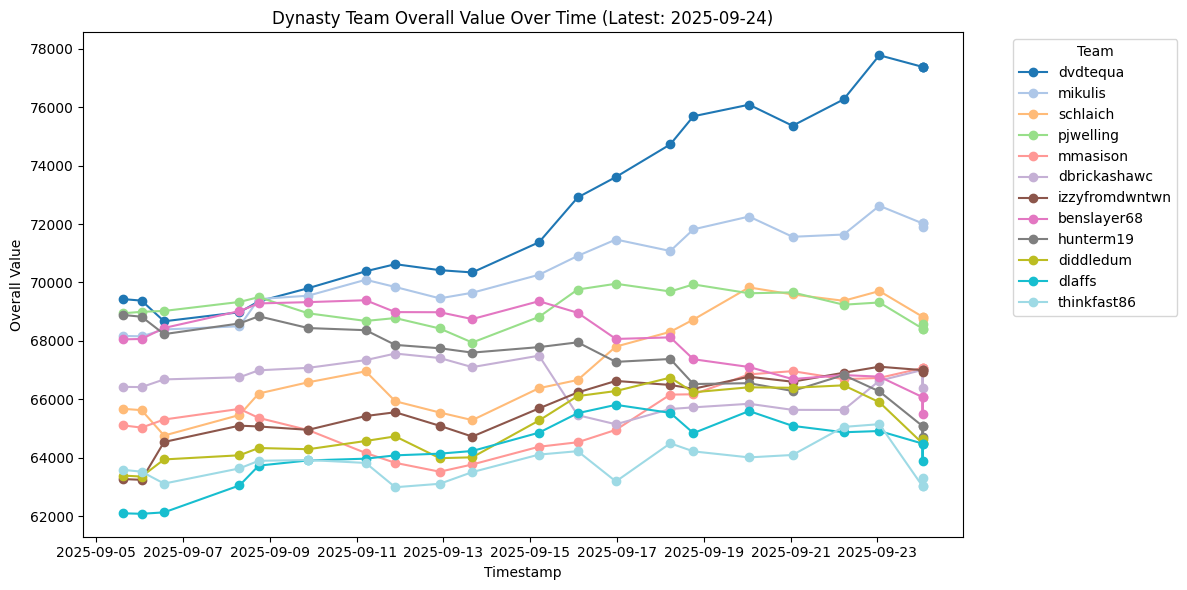

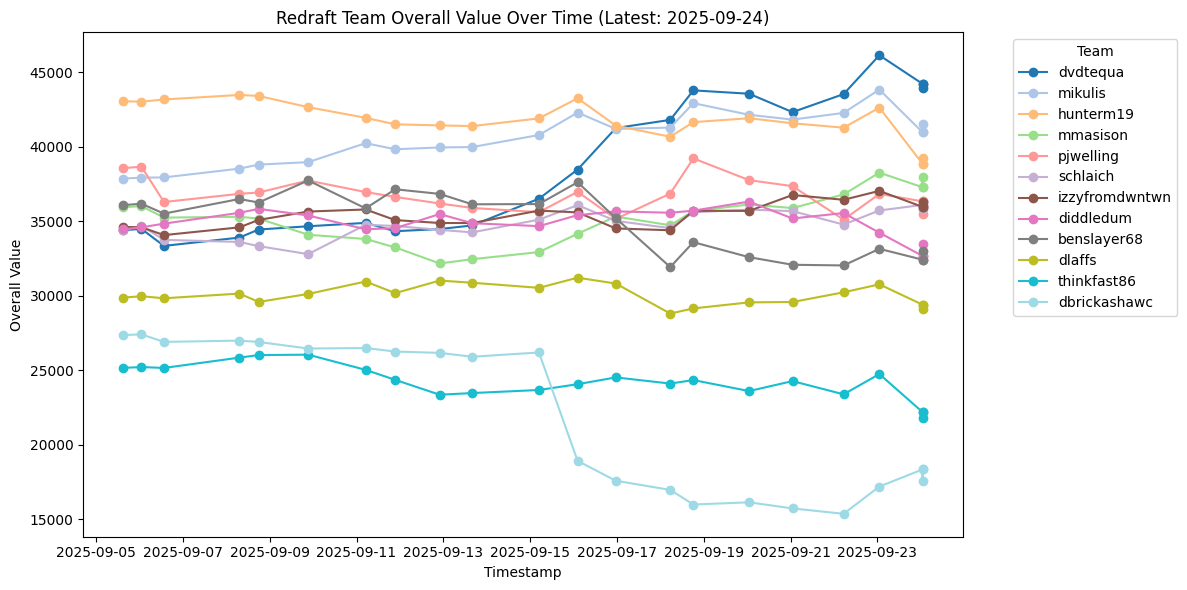

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Dynasty plot with distinct colors
dynasty_team_cols = [col for col in df_dynasty.columns if col.startswith('dynasty_team_')]
colors = plt.get_cmap('tab20', len(dynasty_team_cols))
latest_dynasty_date = df_dynasty['timestamp'].max().date()

plt.figure(figsize=(12, 6))
for idx, col in enumerate(dynasty_team_cols):
    plt.plot(df_dynasty['timestamp'], df_dynasty[col], marker='o', label=col.replace('dynasty_team_', ''), color=colors(idx))
plt.title(f'Dynasty Team Overall Value Over Time (Latest: {latest_dynasty_date})')
plt.xlabel('Timestamp')
plt.ylabel('Overall Value')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Redraft plot with distinct colors
redraft_team_cols = [col for col in df_redraft.columns if col.startswith('redraft_team_')]
colors = plt.get_cmap('tab20', len(redraft_team_cols))
latest_redraft_date = df_redraft['timestamp'].max().date()

plt.figure(figsize=(12, 6))
for idx, col in enumerate(redraft_team_cols):
    plt.plot(df_redraft['timestamp'], df_redraft[col], marker='o', label=col.replace('redraft_team_', ''), color=colors(idx))
plt.title(f'Redraft Team Overall Value Over Time (Latest: {latest_redraft_date})')
plt.xlabel('Timestamp')
plt.ylabel('Overall Value')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()